# Dengue Model Building

**1. Prepare Workspace**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import datetime
green, orange = '#00A57B', '#EF5300'
pd.set_option('display.max_columns', None)

import statsmodels.api as sm

# Import data
df = pd.read_csv('dengue_cleaned_data.csv')

**2. Adjust Data**

In [2]:
# Remove confusing variables
vege = ['vege.ndvi_nw', 'vege.ndvi_sw', 'vege.ndvi_ne', 'vege.ndvi_se', 'vege.ndvi_nw_last_week',
        'vege.ndvi_sw_last_week', 'vege.ndvi_ne_last_week', 'vege.ndvi_se_last_week']
df = df.drop(vege, axis=1)

In [3]:
# Split into two sets for each city
df_sj = df
df_iq = df[df['city'] == -1]

**3. Test Model**

In [4]:
# Build GML for San Juan
X_sj = df_sj.drop(['y.total_cases'], axis=1)
y_sj = df_sj['y.total_cases'].astype(float)

X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(X_sj, y_sj, test_size=0.30, random_state=101)
glm_sj = sm.GLM(y_train_sj, X_train_sj, family=sm.families.NegativeBinomial())
model_sj = glm_sj.fit()

y_pred_sj = model_sj.predict(X_test_sj)
print('SJ MAE: ', mean_absolute_error(y_test_sj, y_pred_sj))

# Build GML model for Iquitos
X_iq = df_iq.drop(['y.total_cases'], axis=1)
y_iq = df_iq['y.total_cases'].astype(float)

X_train_iq, X_test_iq, y_train_iq, y_test_iq = train_test_split(X_iq, y_iq, test_size=0.30, random_state=101)
glm_iq = sm.GLM(y_train_iq, X_train_iq, family=sm.families.NegativeBinomial())
model_iq = glm_iq.fit()

y_pred_iq = model_iq.predict(X_test_iq)
print('IQ MAE: ', mean_absolute_error(y_test_iq, y_pred_iq))

print('Total MAE: ', (mean_absolute_error(y_test_sj, y_pred_sj) * 2 + mean_absolute_error(y_test_iq, y_pred_iq)) / 3)

full_glm_sj = sm.GLM(y_sj, X_sj, family=sm.families.NegativeBinomial())
full_model_sj = full_glm_sj.fit()

full_glm_iq = sm.GLM(y_sj, X_sj, family=sm.families.NegativeBinomial())
full_model_iq = full_glm_iq.fit()

SJ MAE:  16.221396371898326
IQ MAE:  6.3965221856271075
Total MAE:  12.946438309807919


In [10]:
from statsmodels.discrete.discrete_model import NegativeBinomial
X_sj = df_sj.drop(['y.total_cases'], axis=1)
y_sj = df_sj['y.total_cases'].astype(float)
X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(X_sj, y_sj, test_size=0.30, random_state=101)
regr = NegativeBinomial(y_train_sj, X_train_sj)
model = regr.fit()
y_pred_sj = model.predict(X_test_sj)
print('SJ MAE: ', mean_absolute_error(y_test_sj, y_pred_sj))
#y_pred_sj = regr.predict(X_test_sj)
#print('MAE: ', mean_absolute_error(y_test_sj, y_pred_sj))

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
SJ MAE:  752391764303.8878


/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:2559: RuntimeWarning: invalid value encountered in subtract
  dgpart = digamma(y + a1) - digamma(a1)
/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:2563: RuntimeWarning: divide by zero encountered in log
  - np.log(a1+mu) - (y-mu)/(a1+mu)).sum() * da1
/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:2563: RuntimeWarning: invalid value encountered in add
  - np.log(a1+mu) - (y-mu)/(a1+mu)).sum() * da1
/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:2467: RuntimeWarning: invalid value encountered in subtract
  gamma_ln(size))
/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:2468: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:2468: RuntimeWarning: invalid val

Text(0.5, 1.0, 'Feature Importances')

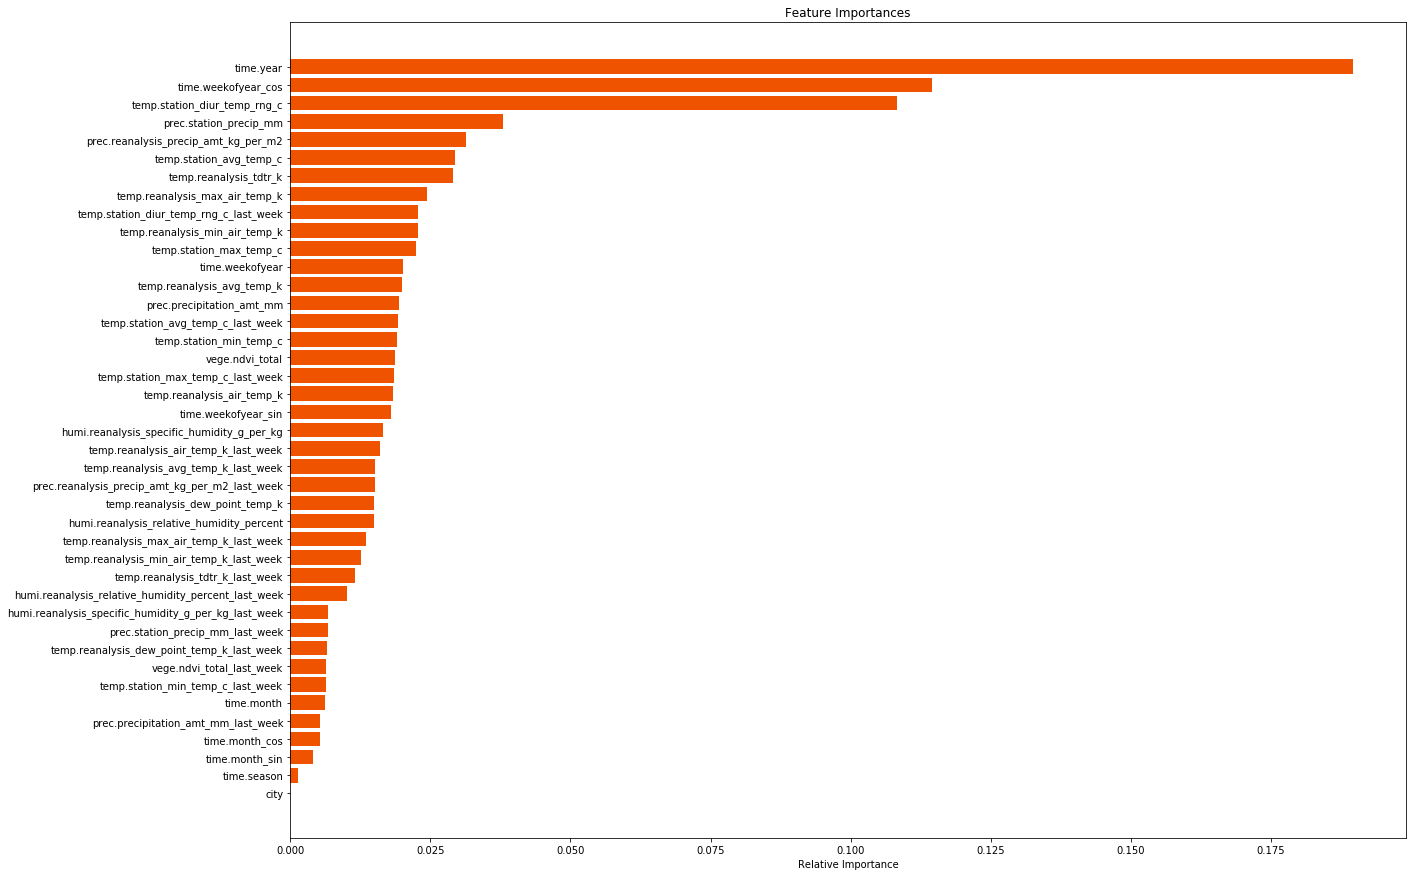

In [5]:
# Build random forest model for San Juan
X_sj = df_sj.drop(['y.total_cases'], axis=1)
y_sj = df_sj['y.total_cases'].astype(float)
rf_oob_sj = RandomForestRegressor(n_estimators=1000, oob_score=True)

rf_oob_sj.fit(X_sj,y_sj)
print('OOB Score: ', rf_oob_sj.oob_score_)

X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(X_sj, y_sj, test_size=0.30, random_state=101)
rf_cv_sj = RandomForestRegressor(n_estimators=1000, oob_score=True)

rf_cv_sj.fit(X_train_sj,y_train_sj)
y_pred_sj = rf_cv_sj.predict(X_test_sj)
print('MAE: ', mean_absolute_error(y_test_sj, y_pred_sj))

# Build random forest model for Iquitos
X_iq = df_iq.drop(['y.total_cases'], axis=1)
y_iq = df_iq['y.total_cases'].astype(float)
rf_oob_iq = RandomForestRegressor(n_estimators=1000, oob_score=True)

rf_oob_iq.fit(X_iq,y_iq)
print('OOB Score: ', rf_oob_iq.oob_score_)

X_train_iq, X_test_iq, y_train_iq, y_test_iq = train_test_split(X_iq, y_iq, test_size=0.30, random_state=101)
rf_cv_iq = RandomForestRegressor(n_estimators=1000, oob_score=True)

rf_cv_iq.fit(X_train_iq,y_train_iq)
y_pred_iq = rf_cv_iq.predict(X_test_iq)
print('MAE: ', mean_absolute_error(y_test_iq, y_pred_iq))

# Check variable importance
features = X_iq.columns.values
importances = rf_oob_iq.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 15))
plt.tight_layout()

plt.barh(range(len(indices)), importances[indices], color=orange, align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importances')

**4. Make Predictions**

In [5]:
# Import prediction data
preds = pd.read_csv('dengue_prepared_predictions.csv')

In [6]:
# Remove confusing variables
vege = ['vege.ndvi_nw', 'vege.ndvi_sw', 'vege.ndvi_ne', 'vege.ndvi_se', 'vege.ndvi_nw_last_week',
        'vege.ndvi_sw_last_week', 'vege.ndvi_ne_last_week', 'vege.ndvi_se_last_week']
preds = preds.drop(vege, axis=1)

# Split into two sets for each city
preds_sj = preds[preds['city'] == 1]
preds_iq = preds[preds['city'] == -1]

In [7]:
# Make predictions
X_preds_sj = preds_sj.reset_index().drop(['y.total_cases', 'index'], axis=1)
X_preds_iq = preds_iq.reset_index().drop(['y.total_cases', 'index'], axis=1)

sj_preds = full_model_sj.predict(X_preds_sj)
iq_preds = full_model_iq.predict(X_preds_iq)

In [8]:
# Export predictions
prep = {'time.year': 'year', 'time.weekofyear': 'weekofyear', 0: 'total_cases'}
city = {1: 'sj', -1: 'iq'}

final_sj = X_preds_sj.join(pd.DataFrame(sj_preds))[['city','time.year','time.weekofyear',0]].rename(prep, axis=1)
final_sj['year'] = final_sj['year']astype(int)
final_sj['weekofyear'] = final_sj['weekofyear'].astype(int)
final_sj['city'] = final_sj['city'].replace(city)
final_sj['total_cases'] = round(final_sj['total_cases'],0).astype(int)

final_iq = X_preds_iq.join(pd.DataFrame(iq_preds))[['city','time.year','time.weekofyear',0]].rename(prep, axis=1)
final_iq['year'] = final_iq['year'].astype(int)
final_iq['weekofyear'] = final_iq['weekofyear'].astype(int)
final_iq['city'] = final_iq['city'].replace(city)
final_iq['total_cases'] = round(final_iq['total_cases'],0).astype(int)

final = pd.concat([final_sj, final_iq], ignore_index=True)
final.to_csv('dengue_submission.csv', index=False)

In [9]:
final

,city,year,weekofyear,total_cases
0,sj,2008,18,9
1,sj,2008,19,8
2,sj,2008,20,10
3,sj,2008,21,10
4,sj,2008,22,11
5,sj,2008,23,13
6,sj,2008,24,11
7,sj,2008,25,15
8,sj,2008,26,18
9,sj,2008,27,18


Records

600 trees:
OOB Score:  0.6087707553260588
MAE:  14.973518090839107

1000 trees:
OOB Score:  0.6126313932582045
MAE:  14.919872979214782

1000 trees and 1000 trees for cleaning:
OOB Score:  0.6089278102343614
MAE:  14.014046511627907

Fixed syntax for model fit:
OOB Score:  0.6185309153605694
MAE:  13.808372093023257

Including month and week of year:
OOB Score:  0.5714266673696689
MAE:  14.280709302325581

Dividing models by city:
OOB Score:  0.6874770315241372
MAE:  18.930873188405798
OOB Score:  0.19307981448105593
MAE:  5.485538961038962
Combined MAE:  14.115567441860463

Divigin models by city but using full df for San Juan:
OOB Score:  0.5737591922799685
MAE:  14.150558139534883
OOB Score:  0.19207814798433276
MAE:  5.480740259740259
Combined MAE:  11.86433904109589

Fixed error with 8 features:
OOB Score:  0.5511757274234327
MAE:  14.121909302325582
OOB Score:  0.23016035820678193
MAE:  4.99235064935065
Combined MAE:  11.714457191780822

Making time features continuous:
OOB Score:  0.5699690387881495
MAE:  14.249446511627907
OOB Score:  0.2222967998501666
MAE:  4.9499220779220785
Combined MAE:  11.797174657534246

**Fixed error with order:
OOB Score:  0.6333903901935929
MAE:  12.754831594634874
OOB Score:  0.5853900007087299
MAE:  3.995170909090909
Combined MAE:  10.208418604651163**

Fixed error with order and city:
OOB Score:  0.5949824376793309
MAE:  14.195818181818183
OOB Score:  0.20428531792381466
MAE:  5.2144545454545455
Combined MAE:  11.823382504288166

Made total cases into float:
OOB Score:  0.5866394827469879
MAE:  14.155179487179488
OOB Score:  0.21750021350778448
MAE:  5.235422077922078
Combined MAE:  11.799017152658662

Remove extra vegetation information:
OOB Score:  0.5935424747257954
MAE:  13.548825174825174
OOB Score:  0.2131954572998116
MAE:  5.078779220779221
Combined MAE:  11.311454545454547


Rejected

Removing 'city':
OOB Score:  0.5633724499298163
MAE:  14.23278139534884
OOB Score:  0.21246447597590623
MAE:  4.997935064935065
Combined MAE:  11.797565068493151

Removing 'temp.reanalysis_air_temp_k':
OOB Score:  0.5764924294485883
MAE:  14.162186046511627
OOB Score:  0.22918306523324006
MAE:  5.021668831168831
Combined MAE:  11.751844178082195

Adding data from two weeks ago:
OOB Score:  0.4759245570321775
MAE:  16.9249906323185
OOB Score:  0.2669877034291632
MAE:  5.205418300653595
Combined MAE:  13.833448275862068